# Importing necessary libs and packages

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading data from titanic dataset

In [2]:
ship = pd.read_csv("titanic.csv", sep = '\t')

In [3]:
ship.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
ship.shape

(156, 12)

In [5]:
ship.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Data Dictionary
---
Understanding Data Variables.

|Variable | What it is...|
|---------|--------------|
|__Survived:__ |    Survival (true = 1, False = 0)|
|__PassengerId:__ | Unique Id of a passenger. | 
|__pclass:__ |   Ticket class|     
|__sex:__| Sex (Male/Female)|     
|__Age:__ |   Age in years|     
|__sibsp:__|    # of siblings / spouses aboard the Titanic |    
|__parch:__ |   # of parents / children aboard the Titanic |    
|__ticket:__ |   Ticket number |    
|__fare:__ |Passenger fare |    
|__cabin:__ |   Cabin number |    
|__embarked:__ |    Port of Embarkation |
||(S: Southampton, C: Cherbourg, Q: Queenstown)|

# Summary Statistics

In [6]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


__*We can see that in 125 rows we have missing values under 'Cabin' column so, we can better drop th3 whole column.*__

In [7]:
pd.options.display.float_format = '{:.2f}'.format
ship.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,156.00,78.50,45.18,1.00,39.75,78.50,117.25,156.00
Survived,156.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
Pclass,156.00,2.42,0.80,1.00,2.00,3.00,3.00,3.00
Age,126.00,28.14,14.61,0.83,19.00,26.00,35.00,71.00
SibSp,156.00,0.62,1.06,0.00,0.00,0.00,1.00,5.00
Parch,156.00,0.40,0.87,0.00,0.00,0.00,0.00,5.00
Fare,156.00,28.11,39.40,6.75,8.00,14.45,30.37,263.00


### Observations:
- By seeing at Survived mean we can say 35% passangers in this data survived.
Under Age we see its range to be between 0.83 years - 71 years.
- That means the ship had new born bay onboard and also old people on it. 
- Age has null values

# Indentifying & Handeling Missing Values

In [8]:
ship['Age'].isnull().sum()

30

#### Feature Engineering `'Title'` column from `'Name'`

In [9]:
ship['Title']=ship['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,Mr


### Imputing median of age with respect to same `'Title'` groups

In [10]:
def imp_age(cols):
    Age = cols[0]
    Title = cols[1]
    if pd.isnull(Age):
        return int(ship[ship["Title"] == Title]["Age"].median())
    else:
        return Age

In [11]:
#imputing Pclass mean age in null values in age
ship['Age'] = ship[["Age", "Title"]].apply(imp_age,axis=1)

In [12]:
#Re-Checking
ship['Age'].isnull().sum()

0

### Droping Cabin Column, which has 125 missing values out of 156.

In [13]:
ship.drop("Cabin",inplace=True,axis=1)

In [14]:
ship.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       1
Title          0
dtype: int64

In [15]:
#droping few rows with null values
ship.dropna(inplace=True)

#### No. of Rows and columns after handling missing values:

In [16]:
ship.shape  

(155, 12)

In [17]:
## Cabin ---> dropped ===>> 11 columns
## Title ---> created ===>> 12 columns

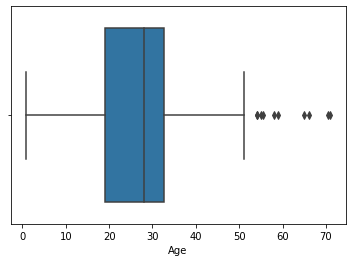

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Age' ,data= ship);

In [19]:
#This function will take dataframe name, the col name for which you want to \n
# check outlier and will return the rows of the df which are outliers
def outlier(df, x):
    #x = input("col name:")
    q1 = df[x].quantile(.25)
    q3 = df[x].quantile(.75)
    iqr = q3 - q1
    max_lim = q3 + 1.5*iqr
    min_lim = q1 - 1.5*iqr
    print("max_lim =", max_lim)
    print("min_lim =", min_lim)
    return df[(df[x] > max_lim)| (df[x] < min_lim)]

# Gender vs Survival

In [20]:
#count of female passengers & Survival_rate
print("Total no.of female passengers:", ship[ship['Sex'].str.match("female")]['Survived'].count())
print("Percentage of Survival in female:", (ship[ship['Sex'].str.match("female")]['Survived'].sum()/ship[ship['Sex'].str.match("female")]['Survived'].count())*100)

Total no.of female passengers: 55
Percentage of Survival in female: 70.9090909090909


In [21]:
#count of male passengers & Survival_rate
print("Total no.of male passengers:", ship[ship['Sex'].str.match("male")]['Survived'].count())
print("Percentage of Survival in male:", (ship[ship['Sex'].str.match("male")]
                                            ['Survived'].sum()/ship[ship['Sex'].str.match("male")]['Survived'].count())*100)

Total no.of male passengers: 100
Percentage of Survival in male: 14.000000000000002


By this we can see the importance that is given to female gender in providing resucing and helping them to survive.

# Pclass vs Survival

In [22]:
print("Total no.of Passengers traveling in class_1:",ship[ship['Pclass'] == 1]['PassengerId'].count())
print("Survival Rate in class_1 Passengers:",(ship[ship['Pclass'] == 1]['Survived'].sum()/ship[ship['Pclass'] == 1]['PassengerId'].count()).round(2)*100)

Total no.of Passengers traveling in class_1: 29
Survival Rate in class_1 Passengers: 38.0


In [23]:
print("Total no.of Passengers traveling in class_2:",ship[ship['Pclass'] == 2]['PassengerId'].count())
print("Survival Rate in class_2 Passengers:",(ship[ship['Pclass'] == 2]['Survived'].sum()/ship[ship['Pclass'] == 2]['PassengerId'].count()).round(2)*100)

Total no.of Passengers traveling in class_2: 30
Survival Rate in class_2 Passengers: 47.0


In [24]:
print("Total no.of Passengers traveling in class_3:",ship[ship['Pclass'] == 3]['PassengerId'].count())
print("Survival Rate in class_3 Passengers:",(ship[ship['Pclass'] == 3]['Survived'].sum()/ship[ship['Pclass'] == 3]['PassengerId'].count()).round(2)*100)

Total no.of Passengers traveling in class_3: 96
Survival Rate in class_3 Passengers: 28.999999999999996


By this we can say Pclass is also a important. 

# Title vs Survival

Title
Don        0
Master     3
Miss      23
Mr        11
Mrs       16
Rev        0
Name: Survived, dtype: int64


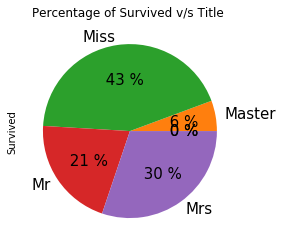

In [25]:
#Groupby 'Title' and get a pie chart of total Survived
surv_Title = ship.groupby('Title')['Survived'].sum()
print(surv_Title)
surv_Title.plot(kind = 'pie', autopct ='% 1.f %%', title = 'Percentage of Survived v/s Title ', fontsize = 15);

Here we can see significance in Title groups

# Age Vs Survival

In [26]:
def age_group(x):
    if x <= 13:
        return 'Children' 
    elif 14 <= x <= 18:
        return 'Teenager'
    elif 19 <= x <= 55:
        return 'Adults'
    else:
        return 'Oldage'

In [27]:
ship['Age_grp']=ship['Age'].map(age_group)

In [28]:
print("Total no.of Children Passengers traveling:",ship[ship['Age_grp'] == "Children"]['PassengerId'].count())
print("Survival Rate in class_1 Passengers:",(ship[ship['Age_grp'] == "Children"]['Survived'].sum()/ship[ship['Age_grp'] == "Children"]['PassengerId'].count()).round(2)*100)

Total no.of Children Passengers traveling: 14
Survival Rate in class_1 Passengers: 43.0


In [29]:
print("Total no.of Teenager Passengers traveling:",ship[ship['Age_grp'] == "Teenager"]['PassengerId'].count())
print("Survival Rate in class_1 Passengers:",(ship[ship['Age_grp'] == "Teenager"]['Survived'].sum()/ship[ship['Age_grp'] == "Teenager"]['PassengerId'].count()).round(2)*100)

Total no.of Teenager Passengers traveling: 20
Survival Rate in class_1 Passengers: 55.00000000000001


In [30]:
print("Total no.of Adults Passengers traveling:",ship[ship['Age_grp'] == "Adults"]['PassengerId'].count())
print("Survival Rate in class_1 Passengers:",(ship[ship['Age_grp'] == "Adults"]['Survived'].sum()/ship[ship['Age_grp'] == "Adults"]['PassengerId'].count()).round(2)*100)

Total no.of Adults Passengers traveling: 114
Survival Rate in class_1 Passengers: 31.0


In [31]:
print("Total no.of Oldage Passengers traveling:",ship[ship['Age_grp'] == "Oldage"]['PassengerId'].count())
print("Survival Rate in class_1 Passengers:",(ship[ship['Age_grp'] == "Oldage"]['Survived'].sum()/ship[ship['Age_grp'] == "Oldage"]['PassengerId'].count()).round(2)*100)

Total no.of Oldage Passengers traveling: 7
Survival Rate in class_1 Passengers: 14.000000000000002


Age_grp
Adults      35
Children     6
Oldage       1
Teenager    11
Name: Survived, dtype: int64


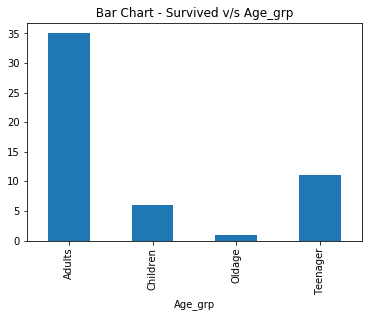

In [32]:
#Groupby 'Age_grp' and get a pie chart of total Survived
surv_Age_grp = ship.groupby('Age_grp')['Survived'].sum()
print(surv_Age_grp)
surv_Age_grp.plot(kind = 'bar', title = ' Bar Chart - Survived v/s Age_grp ', fontsize = 10);

No much difference is seen between age groups.
But children and oldage people were given high priority compared to other age groups, they have 38% survival rate. 

In [33]:
ship['SibSp'].unique() #This is the size of family

array([1, 0, 3, 4, 2, 5], dtype=int64)

SibSp
0    32
1    18
2     0
3     2
4     1
5     0
Name: Survived, dtype: int64


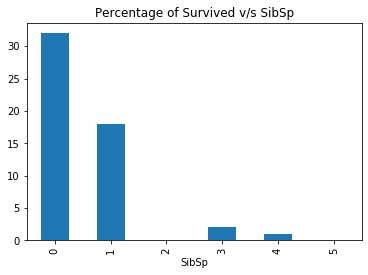

In [34]:
surv_SibSp = ship.groupby('SibSp')['Survived'].sum()
print(surv_SibSp)
surv_SibSp.plot(kind = 'bar',  title = 'Percentage of Survived v/s SibSp', fontsize = 10)

Embarked
C    12
Q     7
S    34
Name: Survived, dtype: int64


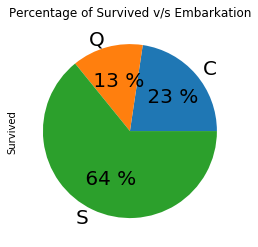

In [35]:
#Groupby 'Embarked' and get a pie chart of total Survived
surv_embark = ship.groupby('Embarked')['Survived'].sum()
print(surv_embark)
surv_embark.plot(kind = 'pie', autopct ='% 1.f %%', title = 'Percentage of Survived v/s Embarkation', fontsize = 20);

__Observation:__
- It's __evident__ that passengers embarked at __Southampton had very high chances to get help and survived__.
- Out of the __total survived passenger 64% were embarked at Southampton.__
- __23% from Cherbourg standing next__ which is not that much when campared to Southampton passangers.
- __Only 13%__ from __Queenstown__ got survived

In [36]:
ship['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  83.475 ,  27.9   ,
        15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,  56.4958,
         7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,   7.7875,
        47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,  34.6542,
        63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,  24.15  ,
         9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,   6.975 ,
         7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,  79.2   ,
         6.75  ,  11.5   ,  36.75  ,   7.7958,  12.525 ,  66.6

In [37]:
ship.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title', 'Age_grp'],
      dtype='object')

# Feature Enginering

In [38]:
ship = pd.get_dummies(ship, columns=['Sex'], drop_first = True)
ship = pd.get_dummies(ship, columns=['Embarked'], drop_first = True)
ship = pd.get_dummies(ship, columns=['Pclass'], drop_first = True)
ship = pd.get_dummies(ship, columns=['Age_grp'], drop_first = True)
ship = pd.get_dummies(ship, columns=['Title'], drop_first = True)

In [39]:
ship.shape

(155, 21)

#### droping old features from ship

In [40]:
ship.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [41]:
print(ship.columns.tolist())

['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3', 'Age_grp_Children', 'Age_grp_Oldage', 'Age_grp_Teenager', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rev']


# Now, lets try fitting a Logistic Regression Model with these Features

### Spliting training and testing data

In [42]:
data = ship

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          155 non-null    int64  
 1   Age               155 non-null    float64
 2   SibSp             155 non-null    int64  
 3   Parch             155 non-null    int64  
 4   Fare              155 non-null    float64
 5   Sex_male          155 non-null    uint8  
 6   Embarked_Q        155 non-null    uint8  
 7   Embarked_S        155 non-null    uint8  
 8   Pclass_2          155 non-null    uint8  
 9   Pclass_3          155 non-null    uint8  
 10  Age_grp_Children  155 non-null    uint8  
 11  Age_grp_Oldage    155 non-null    uint8  
 12  Age_grp_Teenager  155 non-null    uint8  
 13  Title_Master      155 non-null    uint8  
 14  Title_Miss        155 non-null    uint8  
 15  Title_Mr          155 non-null    uint8  
 16  Title_Mrs         155 non-null    uint8  
 1

In [44]:
data_train=data.sample(frac=0.80,random_state=250)
data_test=data.drop(data_train.index)

In [45]:
data_test.shape

(31, 18)

In [46]:
data_train.shape

(124, 18)

In [47]:
data_test.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Pclass_2', 'Pclass_3', 'Age_grp_Children',
       'Age_grp_Oldage', 'Age_grp_Teenager', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Rev'],
      dtype='object')

In [48]:
## Build Model
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [49]:
model1=smf.glm("Survived~Age_grp_Children+Age_grp_Oldage+Age_grp_Teenager+SibSp+Parch+Fare+Sex_male+Embarked_Q+Embarked_S+Pclass_2+Pclass_3+Title_Master+Title_Miss+Title_Mr+Title_Mrs+Title_Rev", data=data_train, family=sm.families.Binomial()).fit()

In [50]:
print(model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  124
Model:                            GLM   Df Residuals:                      109
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -49.890
Date:                Sat, 01 Aug 2020   Deviance:                       99.779
Time:                        17:03:07   Pearson chi2:                     120.
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1281    835.818  

# Metric Evaluation with Confussion Matrix

In [51]:
## Let's check confusion matrix and AUC
import sklearn.metrics as metrics

In [52]:
y_true=data_test['Survived']
y_pred=model1.predict(data_test)

In [53]:
y_pred.sort_values().head(8)

86    0.01
30    0.03
0     0.05
153   0.07
118   0.07
71    0.09
81    0.09
4     0.09
dtype: float64

### ROC curve

In [89]:
y_score=model1.predict(data_test)
fpr,tpr,thresholds=metrics.roc_curve(y_true,y_score)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)

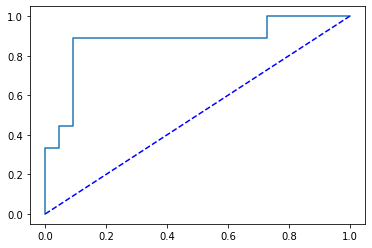

In [55]:
plt.plot(fpr,tpr,"-")
plt.plot(x,y,'b--');

In [56]:
y_true=data_test['Survived']
y_pred=model1.predict(data_test).map(lambda x:1 if x>0.35 else 0)

CM = metrics.confusion_matrix(y_true,y_pred)

print("  actual")
print(CM)

print("----------")
print("   TN FP")
print("   FN TP")



print("----------")

TN = CM[0,0]
TP = CM[1,1]
FN = CM[1,0]
FP = CM[0,1]

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

print("The probability of predicting Survived correctly is ",sensitivity.round(2))
print("The probability of predicting not Survived correctly is ",specificity.round(2))

  actual
[[20  2]
 [ 3  6]]
----------
   TN FP
   FN TP
----------
The probability of predicting Survived correctly is  0.67
The probability of predicting not Survived correctly is  0.91


In [57]:
# Accuracy of the confusion matrix 
total=sum(sum(CM))

accuracy=(CM[0,0]+CM[1,1])/total
print ('Accuracy : ', accuracy*100)

Accuracy :  83.87096774193549


In [58]:
model2=smf.glm("Survived~SibSp+Sex_male", data=data_train, family=sm.families.Binomial()).fit()

In [59]:
print(model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  124
Model:                            GLM   Df Residuals:                      121
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.805
Date:                Sat, 01 Aug 2020   Deviance:                       115.61
Time:                        17:03:09   Pearson chi2:                     119.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4285      0.428      3.338      0.0

# Metric Evaluation with Confussion Matrix for model2

In [60]:
y_true=data_test['Survived']
y_pred=model2.predict(data_test)

In [61]:
y_pred.sort_values().head(8)

0     0.11
117   0.11
86    0.11
137   0.11
71    0.17
121   0.18
118   0.18
115   0.18
dtype: float64

In [62]:
## ROC curve
y_score=model2.predict(data_test)
fpr,tpr,thresholds=metrics.roc_curve(y_true,y_score)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)

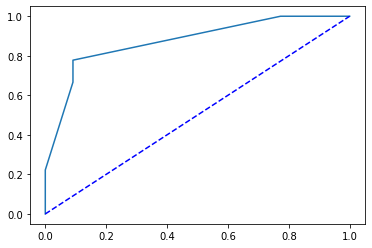

In [63]:
plt.plot(fpr,tpr,"-")
plt.plot(x,y,'b--');

In [64]:
y_true=data_test['Survived']
y_pred=model2.predict(data_test).map(lambda x:1 if x>0.2 else 0)

CM = metrics.confusion_matrix(y_true,y_pred)

print("  actual")
print(CM)

print("----------")
print("   TN FP")
print("   FN TP")



print("----------")

TN = CM[0,0]
FP = CM[0,1]
FN = CM[1,0]
TP = CM[1,1]

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

print("The probability of predicting Survived correctly is ",sensitivity.round(2))
print("The probability of predicting not Survived correctly is ",specificity.round(2))

  actual
[[20  2]
 [ 2  7]]
----------
   TN FP
   FN TP
----------
The probability of predicting Survived correctly is  0.78
The probability of predicting not Survived correctly is  0.91


In [65]:
# Accuracy of the confusion matrix 
total=sum(sum(CM))

accuracy_logistic_model2=(CM[0,0]+CM[1,1])/total
print ('Accuracy : ', accuracy_logistic_model2*100)

Accuracy :  87.09677419354838


# Naive - Bayes Classifier

In [66]:
import os
import pandas as pd
from time import time
from sklearn.naive_bayes import GaussianNB, BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 
from sklearn.metrics import confusion_matrix


In [67]:
data_set = data

In [68]:
data_set.shape

(155, 18)

In [69]:
data_set.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Age_grp_Children,Age_grp_Oldage,Age_grp_Teenager,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,0,22.00,1,0,7.25,1,0,1,0,1,0,0,0,0,0,1,0,0
1,1,38.00,1,0,71.28,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,26.00,0,0,7.92,0,0,1,0,1,0,0,0,0,1,0,0,0
3,1,35.00,1,0,53.10,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,35.00,0,0,8.05,1,0,1,0,1,0,0,0,0,0,1,0,0


In [70]:
# Separating the data from Target Variable
X=data_set.iloc[:,1:]
X.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Pclass_2', 'Pclass_3', 'Age_grp_Children', 'Age_grp_Oldage',
       'Age_grp_Teenager', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rev'],
      dtype='object')

In [71]:
Y=data_set['Survived']

In [72]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1) 

In [73]:
# try different Naive Bayes methods

gnb = GaussianNB() 
#gnb=BernoulliNB()
#gnb=MultinomialNB()

## Naive Bayes Algorithm

#### We try different Naive Bayes methods
1. *Gaussian Naive Bayes Method* - __GaussianNB()__
2. *Bernoulli Naive Bayes Method* - __BernoulliNB()__
3. *Multinomial Naive Bayes Method* - __MultinomialNB()__

And the we will compare the acuuracy and choose the best performing model.

### Gaussian Naive Bayes Method 

In [74]:
gnb = GaussianNB() 

In [75]:
print("Start training...")
tStart = time()
gnb.fit(x_train, y_train)
tEnd = time()
print("Training time: ", round(tEnd-tStart, 3), "s")

# making predictions on the testing set 
y_pred = gnb.predict(x_test) 
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)


Start training...
Training time:  0.012 s
Accuracy:  74.19354838709677


In [76]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n') 

Confusion Matrix is:
[[15  7]
 [ 1  8]]


### Bernoulli Naive Bayes Method

In [77]:
bnb=BernoulliNB()

In [78]:
print("Start training...")
tStart = time()
bnb.fit(x_train, y_train)
tEnd = time()
print("Training time: ", round(tEnd-tStart, 3), "s")

# making predictions on the testing set 
y_pred = bnb.predict(x_test) 
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)


Start training...
Training time:  0.013 s
Accuracy:  83.87096774193549


In [79]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n') 

Confusion Matrix is:
[[18  4]
 [ 1  8]]


### Multinomial Naive Bayes Method

In [80]:
mnb=MultinomialNB()

In [81]:
print("Start training...")
tStart = time()
mnb.fit(x_train, y_train)
tEnd = time()
print("Training time: ", round(tEnd-tStart, 3), "s")

# making predictions on the testing set 
y_pred = mnb.predict(x_test) 
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)


Start training...
Training time:  0.009 s
Accuracy:  64.51612903225806


In [82]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n') 

Confusion Matrix is:
[[17  5]
 [ 6  3]]


## Accuracy Comparision

|Method|Model|Accuracy|
|------|-----|--------|
|GaussianNB()|gnb|74.19|
|`BernouliNB()`|`bnb`|`83.87`|
|MultinomialNB()|mnb|64.51|


__So, lets go ahead with Bernouli Naive Bayes method which has highest of 86.87% accuracy and checks its ROC curve.__

# ROC Curve

In [83]:
bnb=BernoulliNB()

bnb.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [84]:
#Return probability estimates for the test vector 

probs = bnb.predict_proba(x_test)
#probs

In [85]:
#Keep Probabilities of the positive class only.
prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)
print('Threshold:', threshold)


Area under the curve: 0.8686868686868686
Threshold: [1.97720866 0.97720866 0.95483339 0.95369388 0.95249475 0.92244317
 0.88352286 0.8779638  0.21951334 0.06419383 0.01780974 0.01137909
 0.00658338]


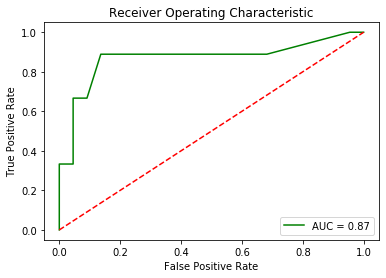

In [86]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'green', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [87]:
def Conclusion():
    
    print("The Logistic regression model-2 explains {}% of the variablity in the data.".format(accuracy_logistic_model2*100))
    print("The Bernouli NB model explains {}% of the variablity in the data.".format(roc_auc * 100))
    
    print('\n\n\t\t\t\t*** Thank You!!! ***')

In [88]:
Conclusion()

The Logistic regression model-2 explains 87.09677419354838% of the variablity in the data.
The Bernouli NB model explains 86.86868686868686% of the variablity in the data.


				*** Thank You!!! ***
